# Import the libraries

In [1]:
import pandas as pd
import numpy as sns
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')

# Reading Data

In [2]:
df=pd.read_csv(r"C:\Users\Ganesh\Downloads\Heart Disease data.csv")
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


### ABOUT THE DATASET AND COLUMNS



 .  age

* sex

* chest pain type (4 values)

   ■ Value 0: typical angina

   * Value 1: atypical angina

   * Value 2: non-anginal pain

   * Value 3: asymptomatic

* trestbps: resting blood pressure (in mm Hg on admission to the hospital)

* chol: serum cholestoral in mg/dl

* fbs: (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
* restecg: resting electrocardiographic results

    * Value 0: normal

     Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)

    * Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria

thalach: maximum heart rate achieved

* exang: exercise induced angina (1 = yes; 0 = no)

* oldpeak = ST depression induced by exercise relative to rest

* slope: the slope of the peak exercise ST segment

    * Value 1: upsloping

    * Value 2: flat

     * Value 3: downsloping

. ca: number of major vessels (0-3) colored by flourosopy

. thal: 3 normal; 6 = fixed defect; 7 = reversable defect

* target: 0=less chance of heart attack, 1=more chance of heart attack

# Data Cleaning & Preparation

In [3]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [4]:
df.tail(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1
1024,54,1,0,120,188,0,1,113,0,1.4,1,1,3,0


In [5]:
df.shape
print ('number of rows are',df.shape[0])
print ('number of columns are',df.shape[1])

number of rows are 1025
number of columns are 14


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [7]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [8]:
df_dup=df.duplicated().any()
print (df_dup)

True


In [9]:
df= df.drop_duplicates()

In [10]:
df.shape

(302, 14)

In [11]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,302.00000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000
mean,54.42053,0.682119,0.963576,131.602649,246.500000,0.149007,0.526490,149.569536,0.327815,1.043046,1.397351,0.718543,2.314570,0.543046
std,9.04797,0.466426,1.032044,17.563394,51.753489,0.356686,0.526027,22.903527,0.470196,1.161452,0.616274,1.006748,0.613026,0.498970
min,29.00000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.00000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.250000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.50000,1.000000,1.000000,130.000000,240.500000,0.000000,1.000000,152.500000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.00000,1.000000,2.000000,140.000000,274.750000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.00000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [12]:
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.094962,-0.063107,0.283121,0.207216,0.119492,-0.111590,-0.395235,0.093216,0.206040,-0.164124,0.302261,0.065317,-0.221476
sex,-0.094962,1.000000,-0.051740,-0.057647,-0.195571,0.046022,-0.060351,-0.046439,0.143460,0.098322,-0.032990,0.113060,0.211452,-0.283609
cp,-0.063107,-0.051740,1.000000,0.046486,-0.072682,0.096018,0.041561,0.293367,-0.392937,-0.146692,0.116854,-0.195356,-0.160370,0.432080
trestbps,0.283121,-0.057647,0.046486,1.000000,0.125256,0.178125,-0.115367,-0.048023,0.068526,0.194600,-0.122873,0.099248,0.062870,-0.146269
chol,0.207216,-0.195571,-0.072682,0.125256,1.000000,0.011428,-0.147602,-0.005308,0.064099,0.050086,0.000417,0.086878,0.096810,-0.081437
fbs,0.119492,0.046022,0.096018,0.178125,0.011428,1.000000,-0.083081,-0.007169,0.024729,0.004514,-0.058654,0.144935,-0.032752,-0.026826
restecg,-0.111590,-0.060351,0.041561,-0.115367,-0.147602,-0.083081,1.000000,0.041210,-0.068807,-0.056251,0.090402,-0.083112,-0.010473,0.134874
thalach,-0.395235,-0.046439,0.293367,-0.048023,-0.005308,-0.007169,0.041210,1.000000,-0.377411,-0.342201,0.384754,-0.228311,-0.094910,0.419955
exang,0.093216,0.143460,-0.392937,0.068526,0.064099,0.024729,-0.068807,-0.377411,1.000000,0.286766,-0.256106,0.125377,0.205826,-0.435601
oldpeak,0.206040,0.098322,-0.146692,0.194600,0.050086,0.004514,-0.056251,-0.342201,0.286766,1.000000,-0.576314,0.236560,0.209090,-0.429146


<Axes: >

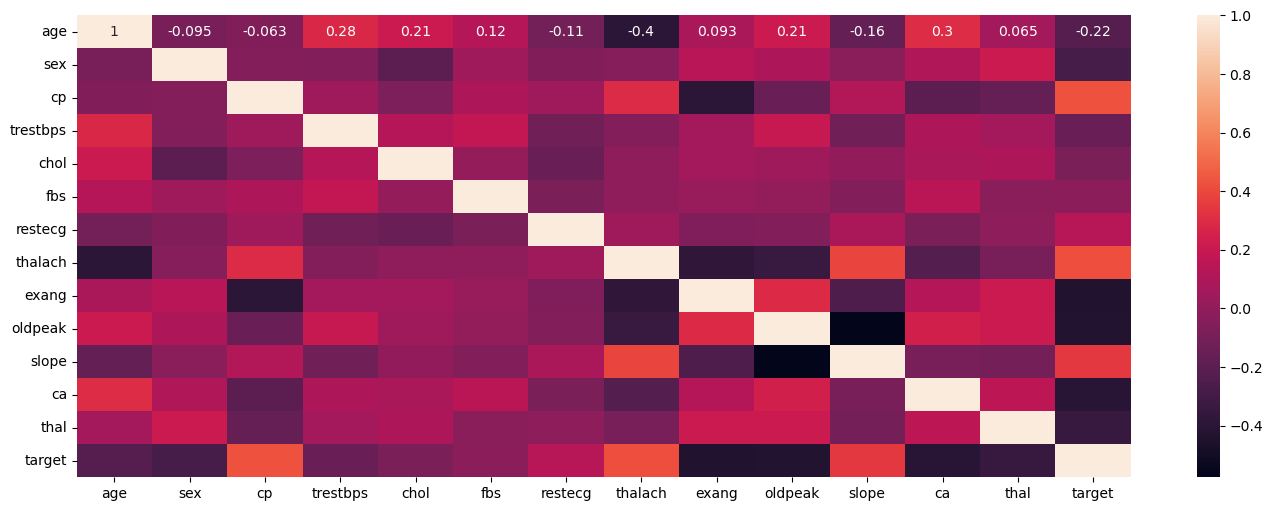

In [13]:
plt.figure (figsize=(17,6))
sns.heatmap(df.corr(),annot=True)

In [14]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [26]:
df['target'].value_counts()

target
1    164
0    138
Name: count, dtype: int64

([<matplotlib.axis.XTick at 0x2257f136490>,
 [Text(0, 0, '0'), Text(1, 0, '1')])

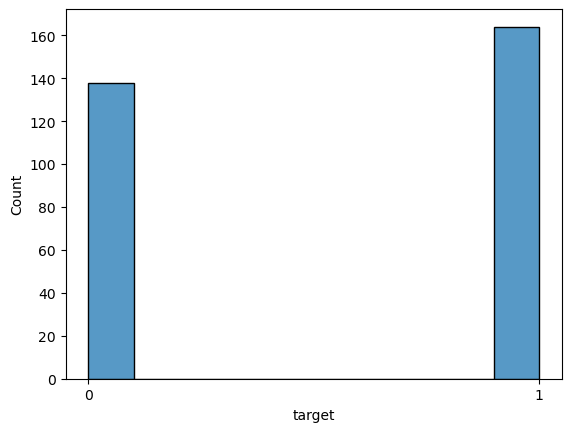

In [31]:
sns.histplot(df['target'])
plt.xticks([0,1])

In [34]:
df['sex'].value_counts()

sex
1    206
0     96
Name: count, dtype: int64

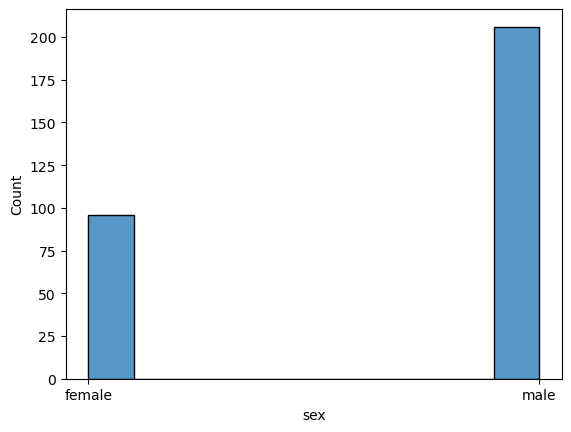

In [40]:
sns.histplot(df['sex'])
plt.xticks([0,1],['female','male'])
plt.show()

# let us do gender dstribution according t the target variable

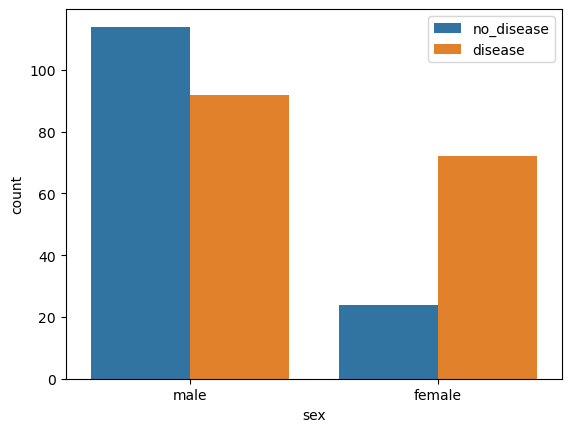

In [51]:
df['target'] = df['target'].astype(str)
df['sex'] = df['sex'].astype(str)

sns.countplot(x='sex', hue='target', data=df)
plt.xticks([0,1],['male','female'])
plt.legend(labels=['no_disease','disease'])
plt.show()

In [52]:
# by this we can see there are more men disease and non-disease

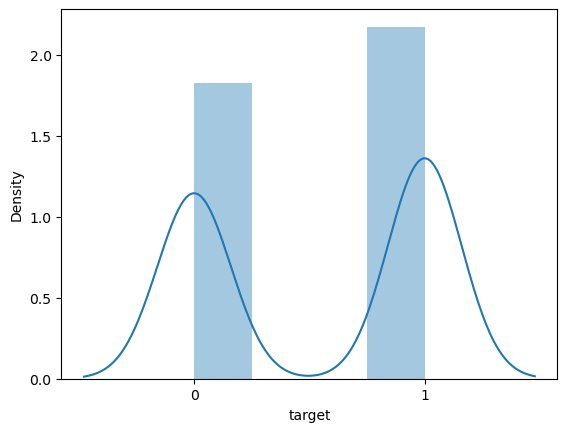

In [24]:
sns.distplot(df['target'])

plt.show()

In [19]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


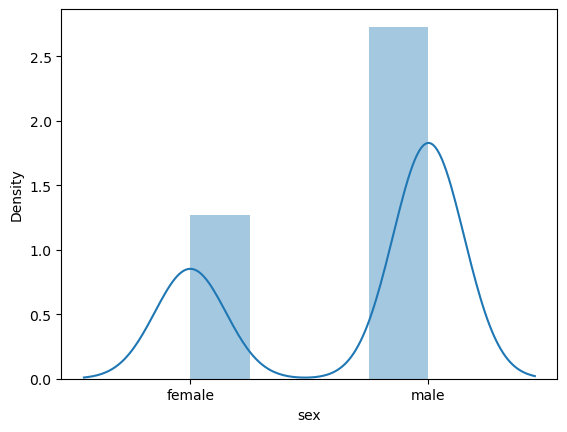

In [22]:

sns.distplot(df['sex'])
plt.xticks([0,1],['female','male'])
plt.show()

([<matplotlib.axis.XTick at 0x1d4fc545450>,
 [Text(0, 0, ' no heart attack '), Text(1, 0, 'yes heart attack')])

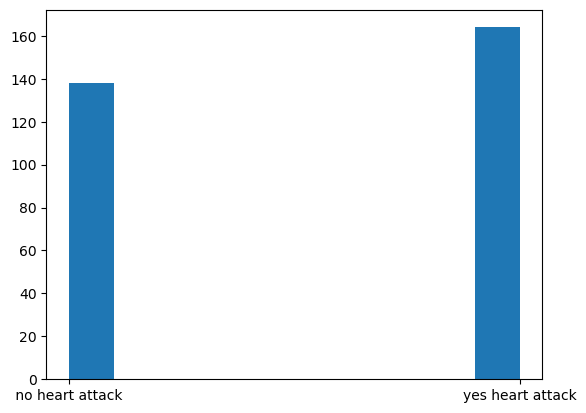

In [22]:
plt.hist(df['target'])
plt.xticks([0,1],[' no heart attack ','yes heart attack'])

In [23]:
df['target'].value_counts()

target
1    164
0    138
Name: count, dtype: int64

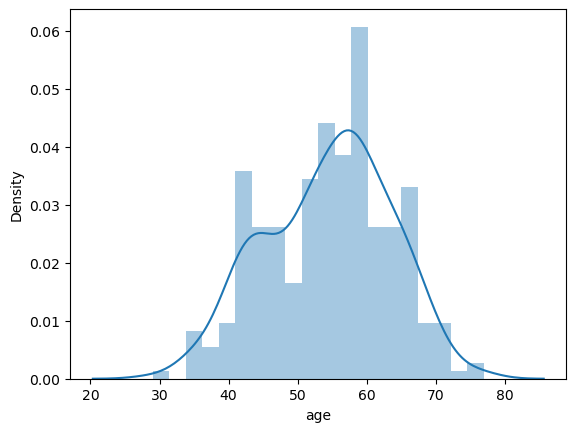

In [53]:
sns.distplot(df['age'],bins=20)
plt.show()

In [54]:
# from this the age 50-60 are more

In [25]:
df['cp'].value_counts()

cp
0    143
2     86
1     50
3     23
Name: count, dtype: int64

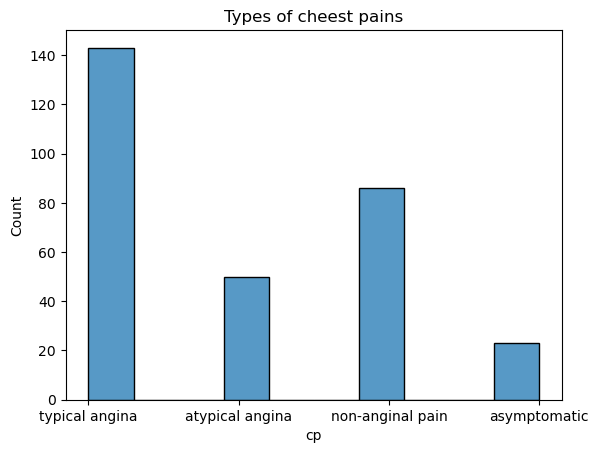

In [56]:
sns.histplot(df['cp'])
plt.xticks([0,1,2,3],['typical angina','atypical angina','non-anginal pain','asymptomatic'])
plt.title('Types of cheest pains')
plt.show()

#through this we able to see that the typical angaina cheest pain is common

# lets show the chest pain as per the target

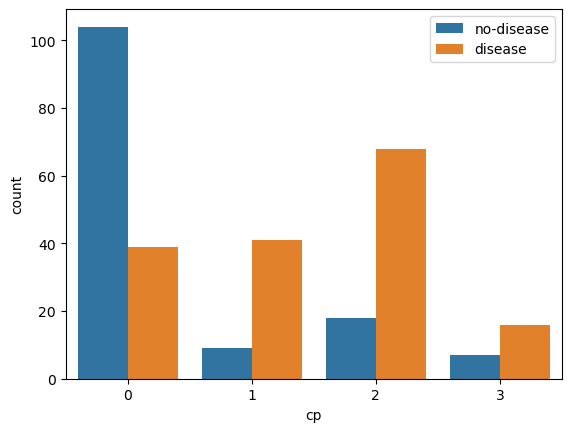

In [58]:
sns.countplot(x='cp',hue='target',data=df)
plt.legend(labels=['no-disease','disease'])
plt.show()

In [59]:
# through this we can understand that the cheest pain is more in healthy people who have no diesease 
# cheest pain is objective type may be due to the stress, phycial activtys and many more

# lets look at the resting blood ressure distrbution


In [60]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

<Axes: >

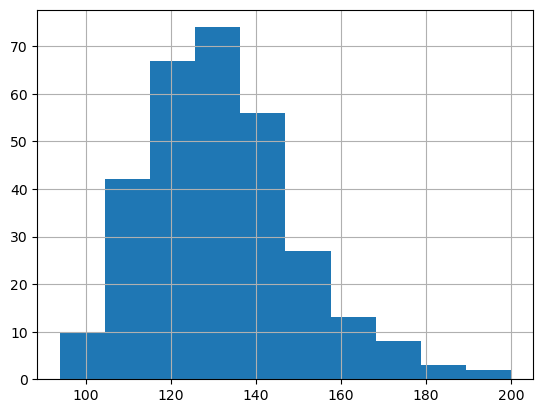

In [28]:
df['trestbps'].hist()

In [62]:
#The blood pressure of the people is 120-140


# comparing resting blood pressure as per sex column

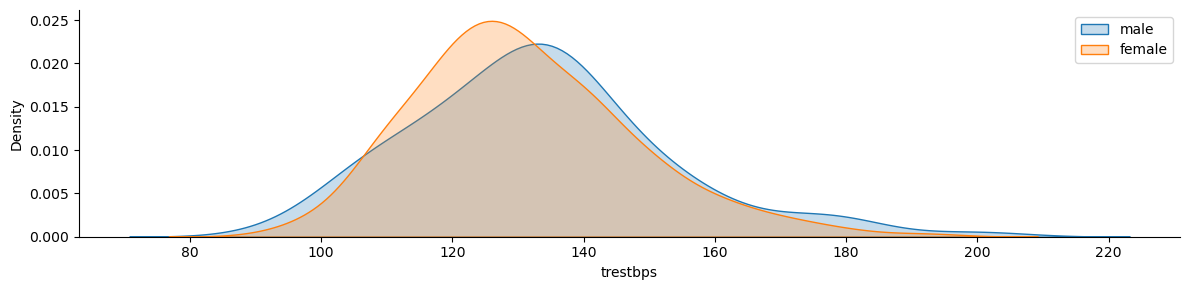

In [29]:
g= sns.FacetGrid(df,hue='sex',aspect=4)
g.map(sns.kdeplot,'trestbps',shade=True)
plt.legend(labels=['male','female'])

Through this we can understand the male has little less resting blood pressure campare to female



Now, lets look at the serum cholesterol

<Axes: >

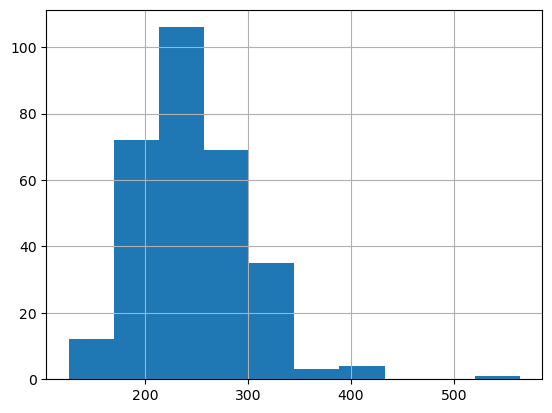

In [63]:
df['chol'].hist()

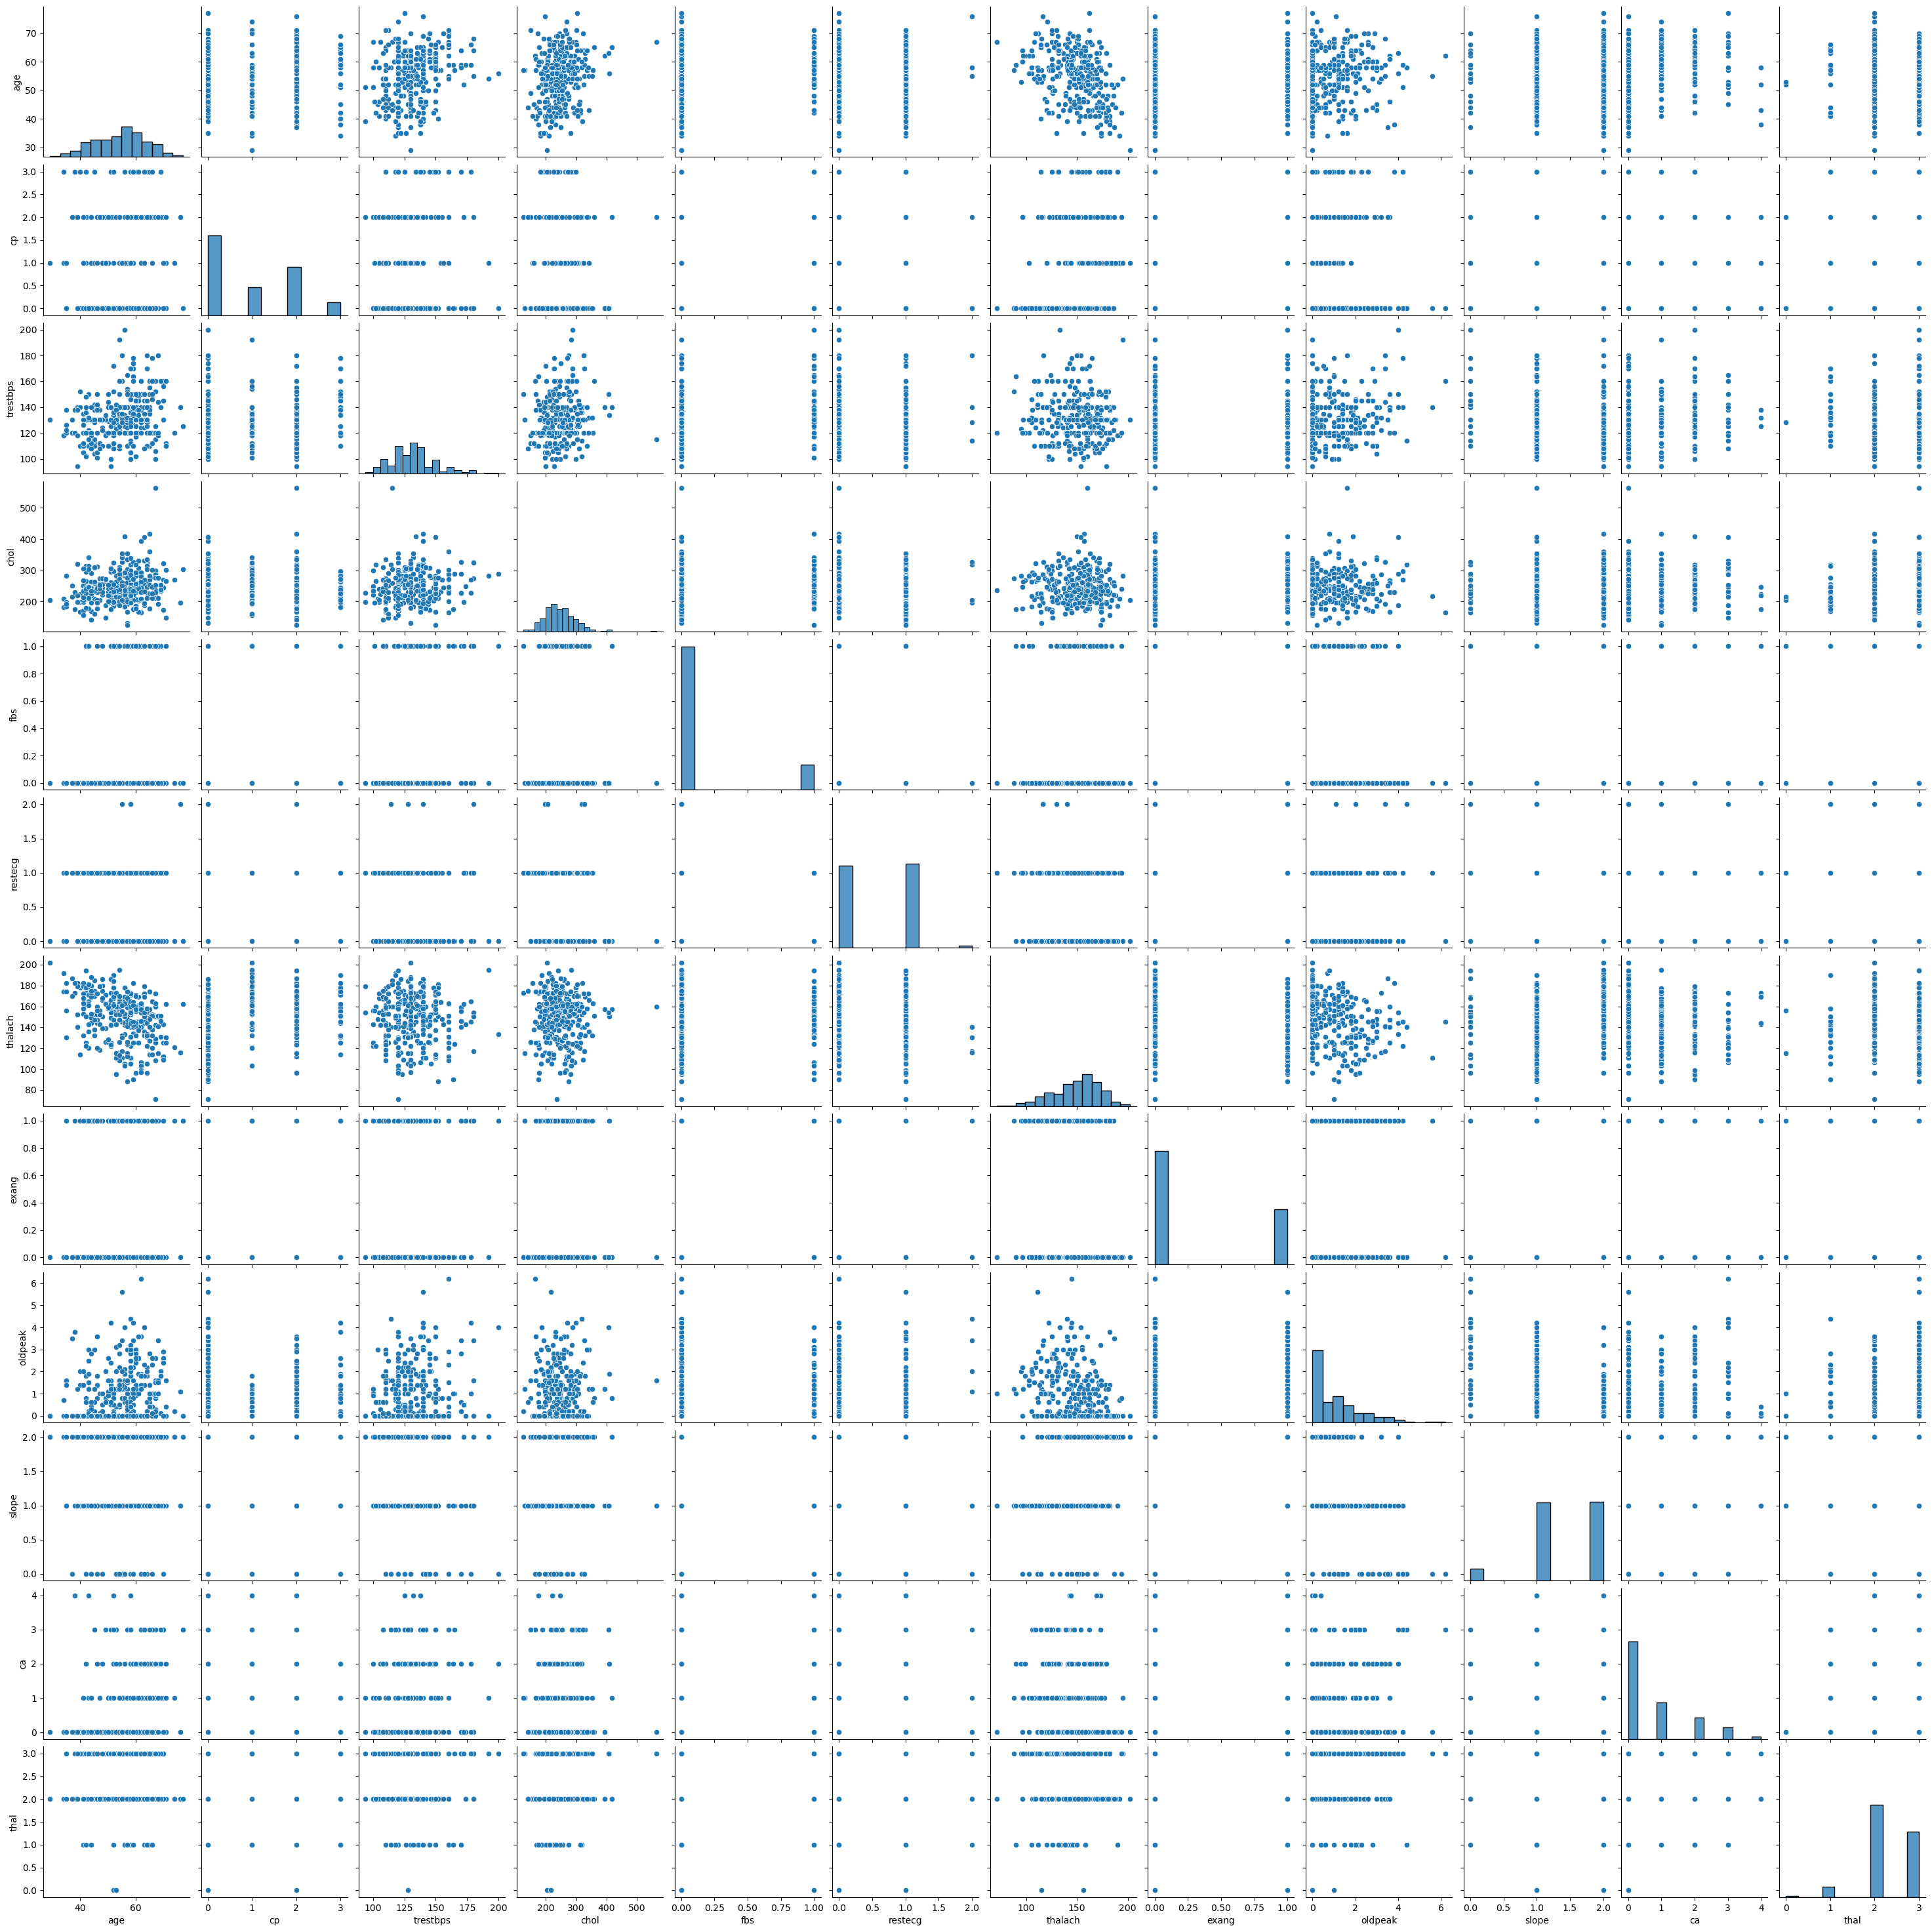

In [64]:
# we want to look at all columns in graical form
sns.pairplot(df)

Now, we are going to seperate the categorycal data columns  and continuious data columns

In [65]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [66]:
categorycal_columns=[]
continuious_columns=[]

for column in df.columns:
    if df[column].nunique() <=10:
        categorycal_columns.append(column)
    else:
        continuious_columns.append(column)
        
    

In [67]:
categorycal_columns

['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'target']

In [68]:
continuious_columns

['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

Now lets plot the countunious data columns

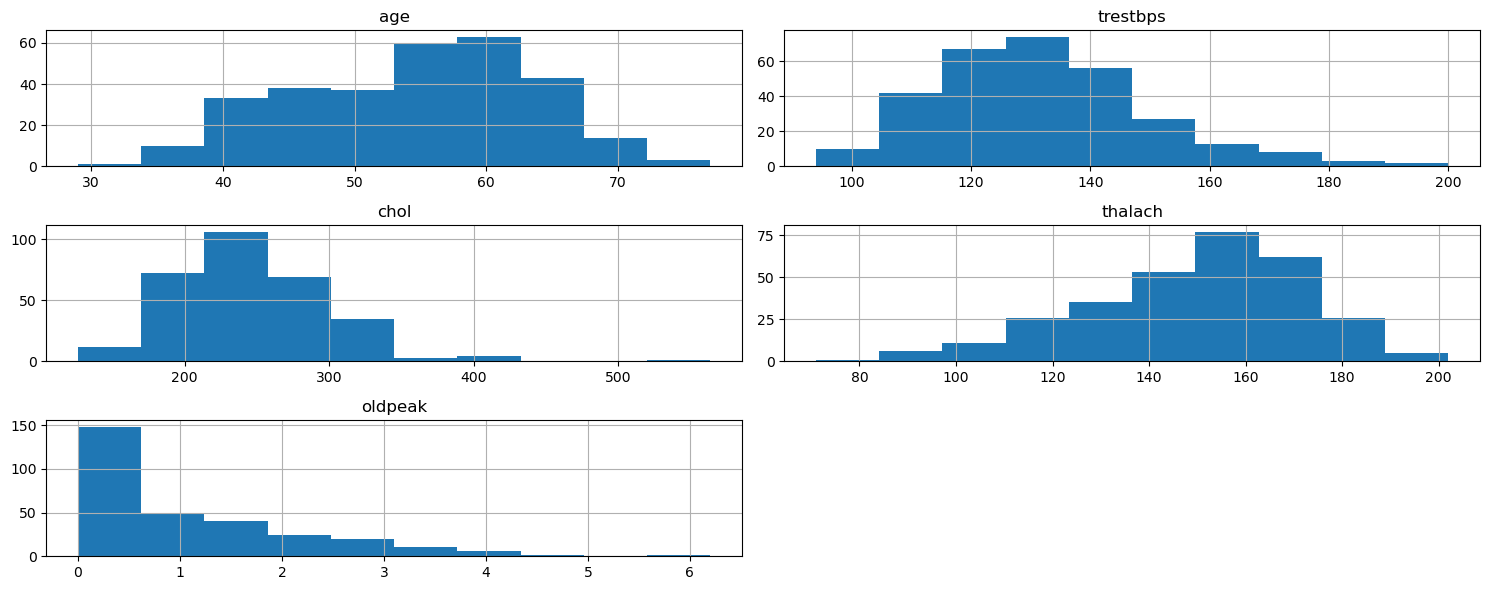

In [69]:
df.hist(continuious_columns,figsize=(15,6))
plt.tight_layout()
plt.show()

Now, lets apply the machine learning models to predict if the person has less chance of heart attack or high chance of heart attack on certain parameters like age, sex, chest pain type and etc

------------------------------------------------------------------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------------------------------------------------------------------
Before apply the machine learning models we need check the  data like
1. Data is balanced or not
2. Check the correlation of the x variables
3. All the x vairables are in numerical data or not
4. Overftting and underfittng

 
  AND OTHER VARIOUS PARAMETERS 

In [70]:
df['target'].value_counts()

target
1    164
0    138
Name: count, dtype: int64

In [71]:
#it is balanced data

In [72]:
num_data=df.drop(columns=['target'])
num_data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
723,68,0,2,120,211,0,0,115,0,1.5,1,0,2
733,44,0,2,108,141,0,1,175,0,0.6,1,0,2
739,52,1,0,128,255,0,1,161,1,0.0,2,1,3
843,59,1,3,160,273,0,0,125,0,0.0,2,0,2


In [73]:
#all our x variables are in numeric only

<Axes: >

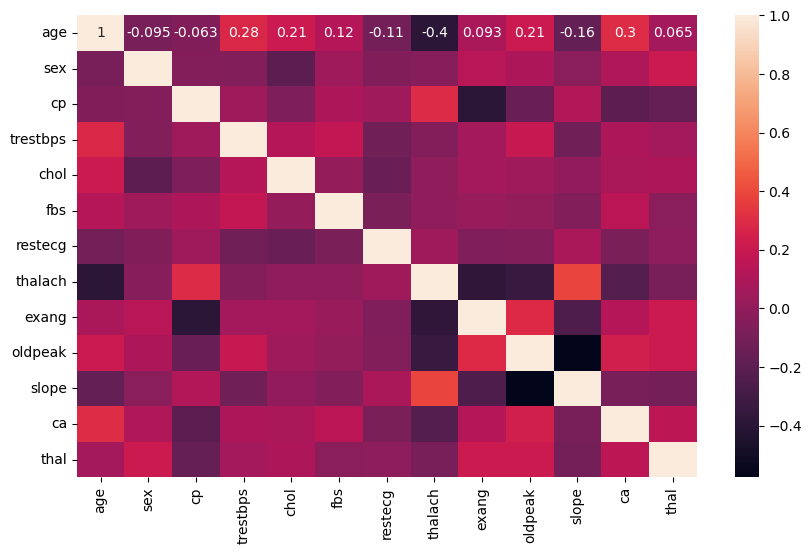

In [74]:
plt.figure (figsize=(10,6))
sns.heatmap(num_data.corr(),annot=True)

In [75]:
#there is no high correlation for the varaiable and now it is ready to predict the target

### lets import the models

In [76]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.ensemble import BaggingClassifier,AdaBoostClassifier, RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier

In [77]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,accuracy_score

In [78]:
x=df.drop(columns=['target'])
x.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2


In [79]:
y= df.iloc[:,-1]
y.head()

0    0
1    0
2    0
3    0
4    0
Name: target, dtype: object

In [80]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.25,random_state=1)

In [81]:
model=[LogisticRegression(random_state=1),DecisionTreeClassifier(max_depth=20,min_samples_split=5,random_state=1),BaggingClassifier(n_estimators=100,max_samples=0.8,random_state=1),AdaBoostClassifier(random_state=1,n_estimators=100),RandomForestClassifier(n_estimators=100,max_samples=0.8,random_state=1),SVC(kernel='sigmoid'),GaussianNB(),KNeighborsClassifier()]

In [84]:
for i in model:
    i.fit(xtrain,ytrain)
    pred=i.predict(xtest)
    print (i)
    
    print (classification_report(pred,ytest))
    print ("For",i,'we got the accuracy of', accuracy_score(pred,ytest))
    print ('------'*40)
    




LogisticRegression(random_state=1)
              precision    recall  f1-score   support

           0       0.85      0.82      0.84        34
           1       0.86      0.88      0.87        42

    accuracy                           0.86        76
   macro avg       0.85      0.85      0.85        76
weighted avg       0.86      0.86      0.86        76

For LogisticRegression(random_state=1) we got the accuracy of 0.8552631578947368
------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
DecisionTreeClassifier(max_depth=20, min_samples_split=5, random_state=1)
              precision    recall  f1-score   support

           0       0.79      0.68      0.73        38
           1       0.72      0.82      0.77        38

    accuracy                           0.75        76
   macro avg       0.75 

# The  best predictions models among all are LogisticRegression and RandomForest which were predicting the values with 85% accuracy